# **Preprocessing Data**

In [ ]:
!pip install pyspark

In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("DiabetesPrediction").getOrCreate()

# Load dataset
file_path = "/content/diabetes_prediction_dataset.csv"
data = pd.read_csv(file_path)

# Mengambil 1000 baris pertama
#data = data_ori.head(1000)

# Buat Spark DataFrame dari Pandas DataFrame
spark_df = spark.createDataFrame(data)


# Mengecek tipe data dan contoh isi dataset
print("Tipe data setiap kolom:")
print(data.dtypes)

# Menampilkan 5 baris pertama dataset
print("\nLima baris pertama dataset:")
data.head()

Tipe data setiap kolom:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Lima baris pertama dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Rename kolom menjadi lebih deskriptif (opsional)
data.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'HeartDisease',
    'smoking_history': 'SmokingHistory',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1cLevel',
    'blood_glucose_level': 'BloodGlucoseLevel',
    'diabetes': 'Diabetes'
}, inplace=True)

print("\nKolom setelah diubah namanya:")
print(data.columns)


Kolom setelah diubah namanya:
Index(['Gender', 'Age', 'Hypertension', 'HeartDisease', 'SmokingHistory',
       'BMI', 'HbA1cLevel', 'BloodGlucoseLevel', 'Diabetes'],
      dtype='object')


In [ ]:
# Mengecek nilai null (kosong) pada dataset
print("\nPemeriksaan nilai null di setiap kolom:")
print(data.isnull().sum())

# Jika ada nilai null, tampilkan persentase data yang hilang
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPersentase data yang hilang:")
print(missing_percentage)


Pemeriksaan nilai null di setiap kolom:
Gender               0
Age                  0
Hypertension         0
HeartDisease         0
SmokingHistory       0
BMI                  0
HbA1cLevel           0
BloodGlucoseLevel    0
Diabetes             0
dtype: int64

Persentase data yang hilang:
Gender               0.0
Age                  0.0
Hypertension         0.0
HeartDisease         0.0
SmokingHistory       0.0
BMI                  0.0
HbA1cLevel           0.0
BloodGlucoseLevel    0.0
Diabetes             0.0
dtype: float64


In [ ]:
# Pastikan kolom yang bersifat kategori diubah ke tipe 'category'
data['Gender'] = data['Gender'].astype('category')
data['SmokingHistory'] = data['SmokingHistory'].astype('category')

# Pastikan kolom target Diabetes tipe datanya adalah integer
data['Diabetes'] = data['Diabetes'].astype(int)

print("\nTipe data setelah perubahan:")
print(data.dtypes)


Tipe data setelah perubahan:
Gender               category
Age                   float64
Hypertension            int64
HeartDisease            int64
SmokingHistory       category
BMI                   float64
HbA1cLevel            float64
BloodGlucoseLevel       int64
Diabetes                int64
dtype: object


In [ ]:
# Menampilkan summary statistik dataset
print("\nSummary statistik data numerik:")
print(data.describe())

# Menampilkan informasi dataset
print("\nInformasi dataset:")
print(data.info())


Summary statistik data numerik:
                 Age  Hypertension   HeartDisease            BMI  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

          HbA1cLevel  BloodGlucoseLevel       Diabetes  
count  100000.000000      100000.000000  100000.000000  
mean        5.527507         138.058060       0.085000  
std         1.070672          40.708136       0.278883  
min         3.500000          80.000000       0.000000  
25%         4.800000         100.000000       0.000000  
50%         

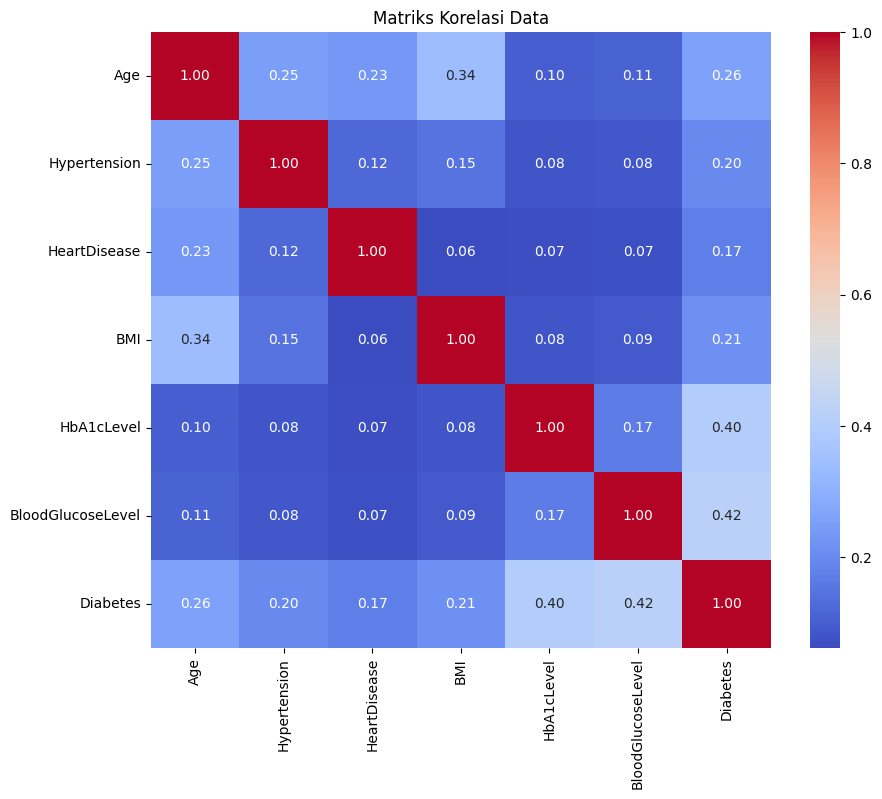

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Korelasi antar fitur numerik
correlation_matrix = numeric_data.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Data")
plt.show()

In [ ]:
# Korelasi antara fitur numerik dan target
correlation_with_target = numeric_data.corr()['Diabetes'].sort_values(ascending=False)

# Menampilkan korelasi fitur numerik dengan target
print("Korelasi fitur numerik dengan target (diabetes):")
print(correlation_with_target)

Korelasi fitur numerik dengan target (diabetes):
Diabetes             1.000000
BloodGlucoseLevel    0.419558
HbA1cLevel           0.400660
Age                  0.258008
BMI                  0.214357
Hypertension         0.197823
HeartDisease         0.171727
Name: Diabetes, dtype: float64


# **exploratory data analysis (EDA)**

# 1. Menghitung jumlah pasien berdasarkan status diabetes ( bar chart)

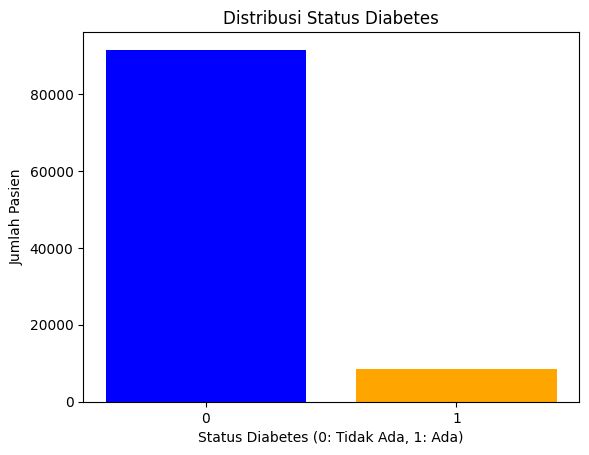

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung jumlah pasien berdasarkan status diabetes
diabetes_counts = spark_df.groupBy("Diabetes").count().toPandas()

# Membuat bar chart
plt.bar(diabetes_counts['Diabetes'].astype(str), diabetes_counts['count'], color=['blue', 'orange'])
plt.title('Distribusi Status Diabetes')
plt.xlabel('Status Diabetes (0: Tidak Ada, 1: Ada)')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)
plt.show()

# 2. Menghitung jumlah pasien berdasarkan jenis kelamin (pie chart)

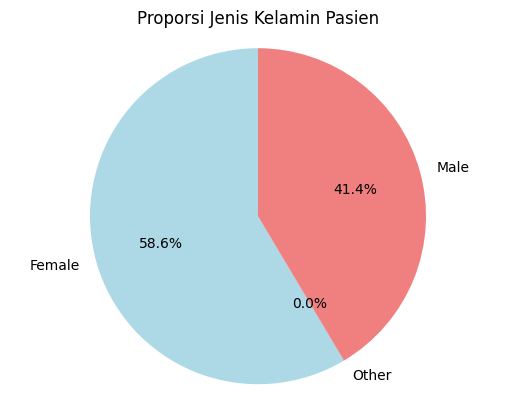

In [ ]:
# Menghitung jumlah pasien berdasarkan jenis kelamin
gender_counts = spark_df.groupBy("Gender").count().toPandas()

# Membuat pie chart
plt.pie(gender_counts['count'], labels=gender_counts['Gender'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red', 'lightcoral'])
plt.title('Proporsi Jenis Kelamin Pasien')
plt.axis('equal')
plt.show()

# Membuat histogram untuk distribusi usia

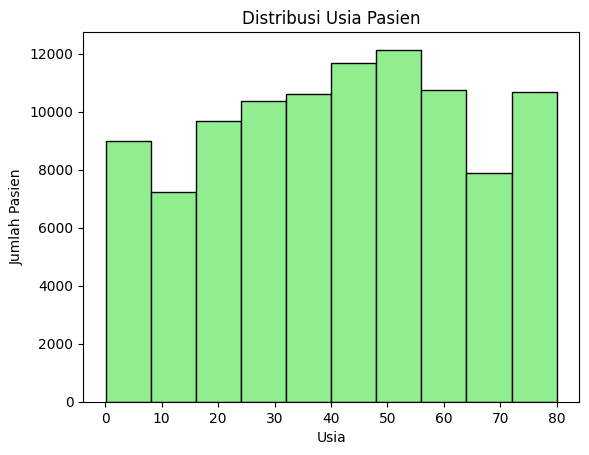

In [ ]:
# Membuat histogram untuk distribusi usia
plt.hist(spark_df.select("Age").toPandas(), bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

# Membuat scatter plot untuk kadar glukosa darah dan BMI

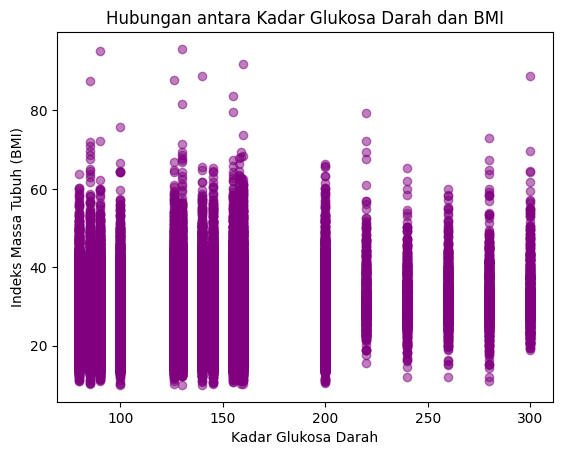

In [ ]:
# Membuat scatter plot untuk kadar glukosa darah dan BMI
plt.scatter(spark_df.select("blood_glucose_level").toPandas(), spark_df.select("BMI").toPandas(), alpha=0.5, color='purple')
plt.title('Hubungan antara Kadar Glukosa Darah dan BMI')
plt.xlabel('Kadar Glukosa Darah')
plt.ylabel('Indeks Massa Tubuh (BMI)')
plt.show()

# **Pengembangan Model Machine Learning**

In [ ]:
# Create Spark DataFrame from Pandas DataFrame using the updated column names
spark_df = spark.createDataFrame(data) # Use the updated 'data' DataFrame

# One-hot encoding for categorical features using PySpark
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in ['Gender', 'SmokingHistory']]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()))
            for indexer in indexers]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + selected_numeric_features,
                          outputCol="features")

from pyspark.ml import Pipeline
# assign to a new variable called data_pipeline to avoid overwriting the original pipeline
data_pipeline = Pipeline(stages=indexers + encoders + [assembler])
transformed_df = data_pipeline.fit(spark_df).transform(spark_df) # spark_df now has updated column names

# Split data into train and test
train_df, test_df = transformed_df.randomSplit([0.8, 0.2], seed=42)

print("Shape X_train:", train_df.count())
print("Shape X_test:", test_df.count())

Shape X_train: 80062
Shape X_test: 19938


# Gradient Boost Tree

In [ ]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="Diabetes", featuresCol="features")
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)

# Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Membagi data menjadi set pelatihan dan pengujian
train_data, test_data = transformed_df.randomSplit([0.8, 0.2], seed=42)

rf = RandomForestClassifier(labelCol="Diabetes", featuresCol="features")
rf_model = rf.fit(train_df)
rf_predictions = rf_model.transform(test_df)

# Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="Diabetes", featuresCol="features")
lr_model = lr.fit(train_df)
lr_predictions = lr_model.transform(test_df)

# Decision Tree Classifier

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="Diabetes", featuresCol="features")
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)

# **EVALUASI Model**

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="Diabetes")

# Fungsi untuk menghitung metrik
def evaluate_model(predictions):
    accuracy = predictions.filter(predictions.Diabetes == predictions.prediction).count() / float(predictions.count())
    f1_score = evaluator.evaluate(predictions)
    precision = predictions.filter((predictions.prediction == 1) & (predictions.Diabetes == 1)).count() / float(predictions.filter(predictions.prediction == 1).count())
    recall = predictions.filter((predictions.prediction == 1) & (predictions.Diabetes == 1)).count() / float(predictions.filter(predictions.Diabetes == 1).count())
    return accuracy, f1_score, precision, recall

# Evaluasi untuk setiap model
rf_metrics = evaluate_model(rf_predictions)
gbt_metrics = evaluate_model(gbt_predictions)
lr_metrics = evaluate_model(lr_predictions)
dt_metrics = evaluate_model(dt_predictions)

# Menampilkan hasil
results = {
    "Random Forest": rf_metrics,
    "Gradient Boosted Trees": gbt_metrics,
    "Logistic Regression": lr_metrics,
    "Decision Tree": dt_metrics
}

for model, metrics in results.items():
    print(f"{model} - Akurasi: {metrics[0]:.2f}, F1 Score: {metrics[1]:.2f}, Presisi: {metrics[2]:.2f}, Recall: {metrics[3]:.2f}")

Random Forest - Akurasi: 0.97, F1 Score: 0.95, Presisi: 1.00, Recall: 0.67
Gradient Boosted Trees - Akurasi: 0.97, F1 Score: 0.97, Presisi: 1.00, Recall: 0.67
Logistic Regression - Akurasi: 0.96, F1 Score: 0.96, Presisi: 0.87, Recall: 0.64
Decision Tree - Akurasi: 0.97, F1 Score: 0.61, Presisi: 1.00, Recall: 0.67


# **Model Terbaik (hyperparameter tuning )**

Gradient Boost Tree

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Membuat model Gradient Boosted Trees
gbt = GBTClassifier(labelCol="Diabetes", featuresCol="features")

# Membangun grid hyperparameter
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [50, 100])
                 .addGrid(gbt.maxDepth, [5, 10, 15])
                 .addGrid(gbt.stepSize, [0.01, 0.1])
                 .build())

# Menggunakan TrainValidationSplit untuk tuning
gbt_tvs = TrainValidationSplit(estimator=gbt,
                               estimatorParamMaps=gbt_paramGrid,
                               evaluator=MulticlassClassificationEvaluator(labelCol="Diabetes", predictionCol="prediction", metricName="accuracy"),
                               trainRatio=0.8)

# Melatih model
best_gbt_model = gbt_tvs.fit(train_df)

# Evaluasi model terbaik
gbt_predictions = best_gbt_model.transform(test_df)
gbt_accuracy = MulticlassClassificationEvaluator(labelCol="Diabetes", predictionCol="prediction", metricName="accuracy").evaluate(gbt_predictions)
print(f"Best Gradient Boosted Trees Model Accuracy: {gbt_accuracy}")

Best Gradient Boosted Trees Model Accuracy: 0.9719630855652522


Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Membagi data menjadi set pelatihan dan pengujian secara otomatis
(train_df, test_df) = transformed_df.randomSplit([0.8, 0.2], seed=42)

# Membuat model Random Forest
rf = RandomForestClassifier(labelCol="Diabetes", featuresCol="features")

# Membangun grid hyperparameter
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50, 100, 150])
             .addGrid(rf.maxDepth, [5, 10, 15])
              .addGrid(rf.featureSubsetStrategy, ['auto', 'sqrt'])
             .build())

# Menggunakan TrainValidationSplit untuk tuning
tvs = TrainValidationSplit(estimator=rf,
                           estimatorParamMaps=paramGrid,
                           evaluator=MulticlassClassificationEvaluator(labelCol="Diabetes", predictionCol="prediction", metricName="accuracy"),
                           trainRatio=0.8)

# Melatih model
best_rf_model = tvs.fit(train_df)

# Evaluasi model terbaik
rf_predictions = best_rf_model.transform(test_df)
rf_accuracy = MulticlassClassificationEvaluator(labelCol="Diabetes", predictionCol="prediction", metricName="accuracy").evaluate(rf_predictions)
print(f"Best Random Forest Model Accuracy: {rf_accuracy}")

Best Random Forest Model Accuracy: 0.9717123081552814
